In [1]:
%reload_ext autoreload
%autoreload 2

import os, psutil

from rocket_fft import numpy_like, scipy_like

numpy_like()

os.environ['NUMEXPR_MAX_THREADS'] = '20'
os.environ['NUMBA_DEBUGINFO'] = '0'

from alphadia.extraction import processlogger
processlogger.init_logging()
import logging

logger = logging.getLogger()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neptune.new as neptune
import alphatims.bruker as bruker

from alphabase.spectral_library.base import SpecLibBase
from alphadia.extraction.planning import Plan, Workflow

yaml_file = 'config.yaml'

raw_files = ['/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_P001_diaP_pydiAID8_1300V_S2-D1_1_1811.d']

output_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_05_29_isotope_debugging'

try:
    neptune_token = os.environ['NEPTUNE_TOKEN']
except KeyError:
    logger.error('NEPTUNE_TOKEN environtment variable not set')


0:00:00.961351  WARNING: WARNING: Temp mmap arrays are written to /var/folders/lc/9594t94d5b5_gn0y04w1jh980000gn/T/temp_mmap_cddfsf7m. Cleanup of this folder is OS dependant, and might need to be triggered manually! Current space: 859,476,803,584
0:00:00.972049  WARNING: WARNING: No Bruker libraries are available for this operating system. Mobility and m/z values need to be estimated. While this estimation often returns acceptable results with errors < 0.02 Th, huge errors (e.g. offsets of 6 Th) have already been observed for some samples!
0:00:00.972373  INFO: 


In [2]:
test_lib = SpecLibBase()
test_lib_location = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/libraries/marvin_scp/MSfragger_library_mod_noLossType_d0_d4_d8_d12_shared_eg_n_fragments.hdf'
test_lib.load_hdf(test_lib_location, load_mod_seq=True)

In [3]:
test_lib.precursor_df.channel.value_counts()

0     91732
4     45867
8     45867
12    45867
Name: channel, dtype: int64

In [4]:
plan = Plan(raw_files, config_update = 
            {'extraction':
                {
                    'target_mobility_tolerance': 0.04,
                    'target_rt_tolerance': 40,
                    'target_ms1_tolerance': 10,
                    'min_epochs': 3,
                }
            }
        )
plan.from_spec_lib_base(test_lib)

0:00:05.132573  PROGRESS:       _   _      _         ___ ___   _   
0:00:05.133072  PROGRESS:      /_\ | |_ __| |_  __ _|   \_ _| /_\  
0:00:05.133495  PROGRESS:     / _ \| | '_ \ ' \/ _` | |) | | / _ \ 
0:00:05.133703  PROGRESS:    /_/ \_\_| .__/_||_\__,_|___/___/_/ \_\
0:00:05.133978  PROGRESS:            |_|                            
0:00:05.134196  PROGRESS: 
0:00:05.134722  INFO: loading default config from /Users/georgwallmann/Documents/git/alphadia/alphadia/extraction/../../misc/config/default.yaml
0:00:05.141437  INFO: Applying config update from dict
0:00:05.141754  PROGRESS: version: 1.0.2
0:00:05.142012  PROGRESS: hostname: PCMANN428.biochem.mpg.de
0:00:05.142228  PROGRESS: date: 2023-06-27 12:46:33
0:00:08.808894  INFO: renaming precursor_columns columns
0:00:08.809902  INFO: renaming fragment_columns columns
0:00:08.810485  INFO: ========= Library Stats =========
0:00:08.810810  INFO: Number of precursors: 229,333
0:00:08.840521  INFO: 	thereof targets:183,468
0:00:08.84

0:00:09.153583  INFO: rt_type automatically determined as irt
0:00:09.154093  INFO: Importing data from /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_P001_diaP_pydiAID8_1300V_S2-D1_1_1811.d
0:00:09.154539  INFO: Using .d import for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_P001_diaP_pydiAID8_1300V_S2-D1_1_1811.d
0:00:09.154849  INFO: Reading frame metadata for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_P001_diaP_pydiAID8_1300V_S2-D1_1_1811.d
0:00:09.297042  INFO: Reading 17,439 frames with 1,609,581,456 detector events for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_P001_diaP_pydiAID8_1300V_S2-D1_1_1811.d
100%|██████████| 17439/174

7792


  0%|          | 0/13651 [00:00<?, ?it/s]/Users/georgwallmann/Documents/git/alphatims/alphatims/utils.py:583: NumbaTypeSafetyWarning: unsafe cast from float64 to float32. Precision may be lost.
  numba_func(i, *args)
/Users/georgwallmann/Documents/git/alphatims/alphatims/utils.py:583: NumbaTypeSafetyWarning: unsafe cast from int64 to float32. Precision may be lost.
  numba_func(i, *args)
100%|██████████| 13651/13651 [00:54<00:00, 250.50it/s] 
0:03:54.031070  WARNING: base_width_mobility has 7 NaNs ( 0.05 % out of 13651)
0:03:54.031740  WARNING: base_width_rt has 7 NaNs ( 0.05 % out of 13651)
0:03:54.032207  WARNING: rt_observed has 7 NaNs ( 0.05 % out of 13651)
0:03:54.033035  WARNING: mobility_observed has 7 NaNs ( 0.05 % out of 13651)
0:03:54.033560  WARNING: mono_ms1_intensity has 7 NaNs ( 0.05 % out of 13651)
0:03:54.034011  WARNING: top_ms1_intensity has 7 NaNs ( 0.05 % out of 13651)
0:03:54.034520  WARNING: sum_ms1_intensity has 7 NaNs ( 0.05 % out of 13651)
0:03:54.035022  WARNI

(13643, 37)
(13643,)


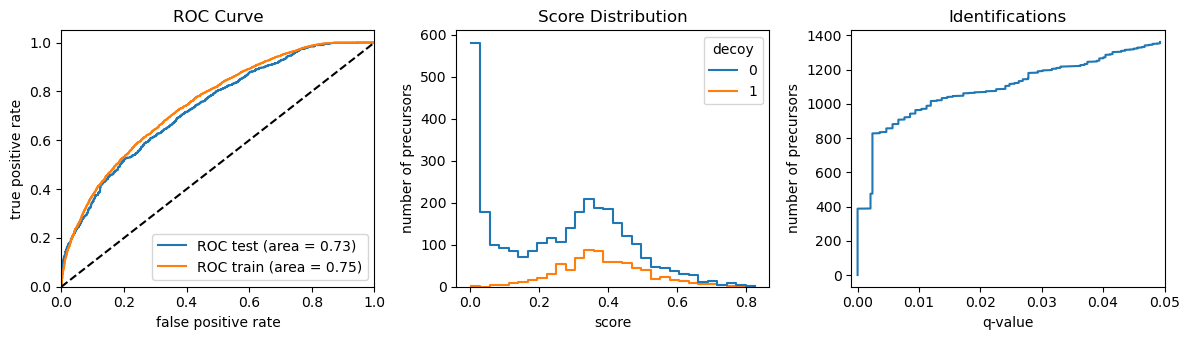

0:03:55.942674  PROGRESS: === checking if recalibration conditions were reached, target 200 precursors ===
0:03:55.945371  PROGRESS: Accumulated precursors: 3,881, 0.01 FDR: 965, 0.001 FDR: 389
0:03:55.946340  INFO: calibration group: precursor, fitting mz estimator 


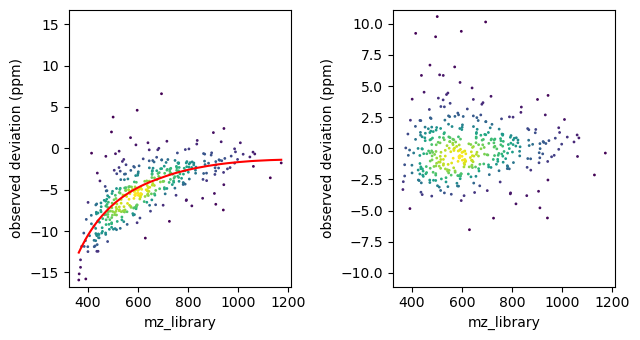

0:03:56.037888  INFO: calibration group: precursor, fitting rt estimator 


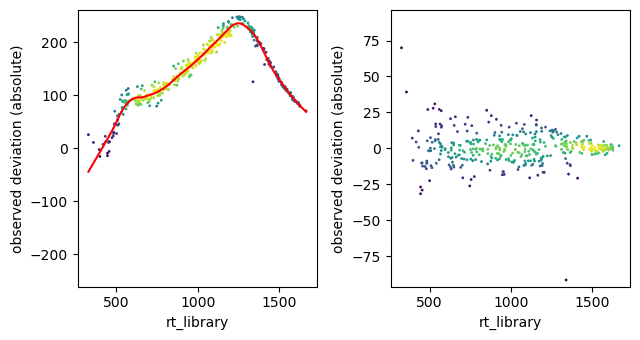

0:03:56.117547  INFO: calibration group: precursor, fitting mobility estimator 


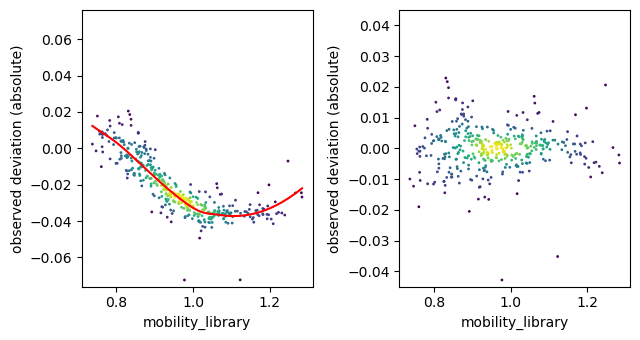

0:03:56.211513  INFO: calibration group: fragment, fitting mz estimator 


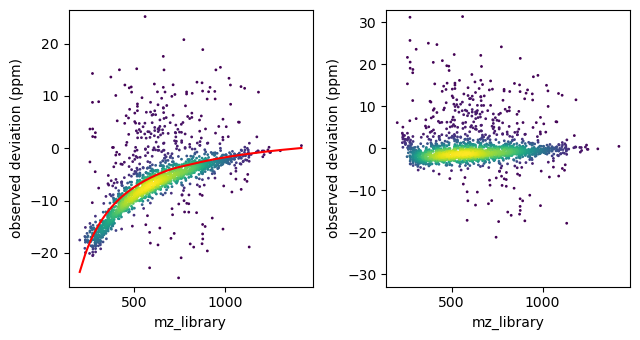

0:03:56.336672  INFO: calibration group: precursor, predicting mz
0:03:56.349883  INFO: calibration group: precursor, predicting rt
0:03:56.377693  INFO: calibration group: precursor, predicting mobility
0:03:56.388338  INFO: calibration group: fragment, predicting mz
0:03:56.702131  PROGRESS: === Epoch 1, step 0, extracting elution groups 0 to 4000 ===
0:03:56.705311  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.04
0:03:56.707458  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:03:56.707754  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:03:56.708015  INFO: FWHM in RT is 4.76 seconds, sigma is 1.05
0:03:56.708235  INFO: FWHM in mobility is 0.010 1/K_0, sigma is 6.51


7830


100%|██████████| 12733/12733 [00:02<00:00, 4723.97it/s]
0:04:07.393764  WARNING: base_width_mobility has 9 NaNs ( 0.07 % out of 12733)
0:04:07.394562  WARNING: base_width_rt has 9 NaNs ( 0.07 % out of 12733)
0:04:07.395168  WARNING: rt_observed has 9 NaNs ( 0.07 % out of 12733)
0:04:07.395818  WARNING: mobility_observed has 9 NaNs ( 0.07 % out of 12733)
0:04:07.396632  WARNING: mono_ms1_intensity has 9 NaNs ( 0.07 % out of 12733)
0:04:07.397230  WARNING: top_ms1_intensity has 9 NaNs ( 0.07 % out of 12733)
0:04:07.398375  WARNING: sum_ms1_intensity has 9 NaNs ( 0.07 % out of 12733)
0:04:07.399490  WARNING: weighted_ms1_intensity has 9 NaNs ( 0.07 % out of 12733)
0:04:07.401733  WARNING: weighted_mass_deviation has 9 NaNs ( 0.07 % out of 12733)
0:04:07.405180  WARNING: weighted_mass_error has 9 NaNs ( 0.07 % out of 12733)
0:04:07.406908  WARNING: mz_library has 9 NaNs ( 0.07 % out of 12733)
0:04:07.407907  WARNING: mz_observed has 9 NaNs ( 0.07 % out of 12733)
0:04:07.409193  WARNING: mo

(12716, 37)
(12716,)


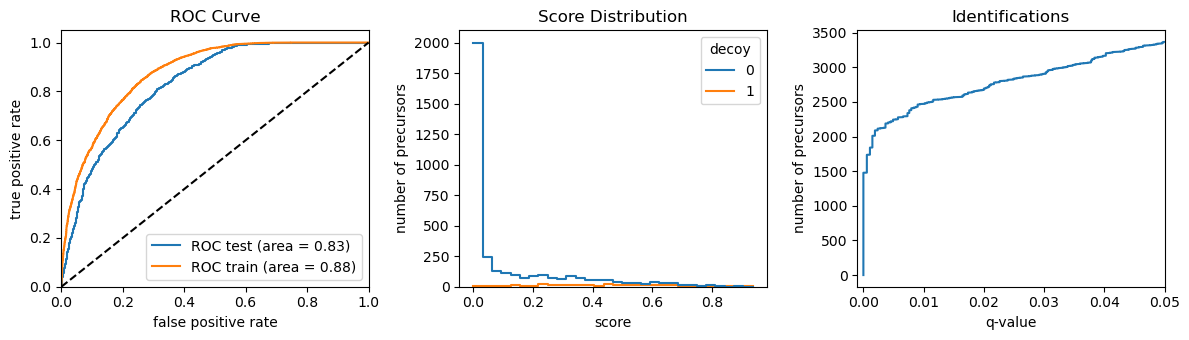

0:04:09.732211  PROGRESS: === checking if recalibration conditions were reached, target 400 precursors ===
0:04:09.732497  PROGRESS: Accumulated precursors: 3,905, 0.01 FDR: 2,472, 0.001 FDR: 1,737
0:04:09.733894  INFO: calibration group: precursor, fitting mz estimator 


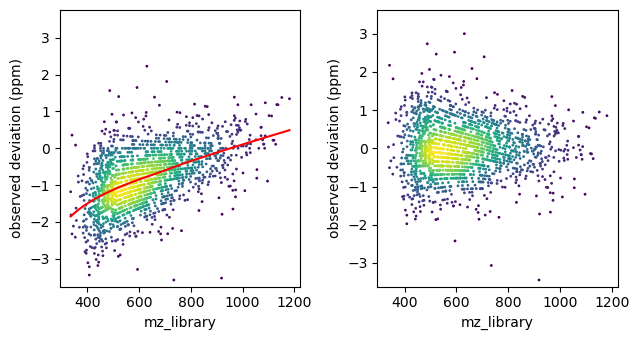

0:04:09.858489  INFO: calibration group: precursor, fitting rt estimator 


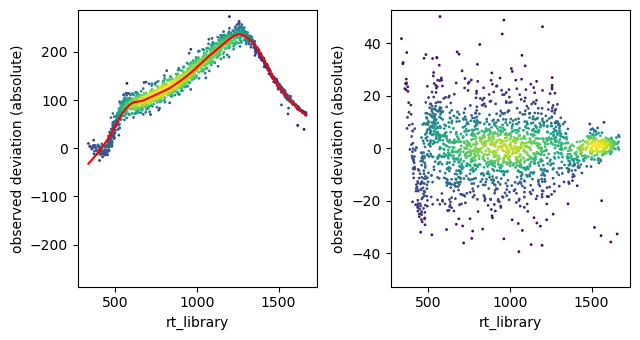

0:04:09.977742  INFO: calibration group: precursor, fitting mobility estimator 


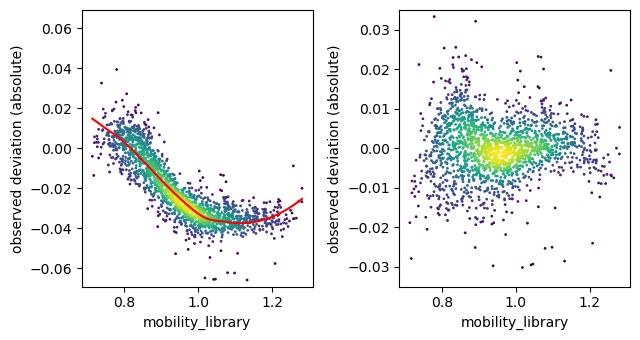

0:04:10.111878  INFO: calibration group: fragment, fitting mz estimator 


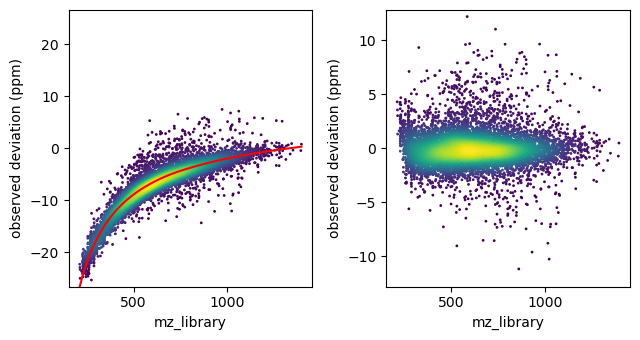

0:04:10.804191  INFO: calibration group: precursor, predicting mz
0:04:10.815419  INFO: calibration group: precursor, predicting rt
0:04:10.848667  INFO: calibration group: precursor, predicting mobility
0:04:10.861164  INFO: calibration group: fragment, predicting mz
0:04:11.170624  PROGRESS: === Epoch 2, step 0, extracting elution groups 0 to 4000 ===
0:04:11.173851  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.04
0:04:11.175697  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:04:11.175982  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:04:11.176212  INFO: FWHM in RT is 4.42 seconds, sigma is 0.98
0:04:11.176579  INFO: FWHM in mobility is 0.007 1/K_0, sigma is 4.31


7802


100%|██████████| 11989/11989 [00:02<00:00, 4686.08it/s]
0:04:21.507379  WARNING: base_width_mobility has 10 NaNs ( 0.08 % out of 11989)
0:04:21.508205  WARNING: base_width_rt has 10 NaNs ( 0.08 % out of 11989)
0:04:21.508779  WARNING: rt_observed has 10 NaNs ( 0.08 % out of 11989)
0:04:21.509415  WARNING: mobility_observed has 10 NaNs ( 0.08 % out of 11989)
0:04:21.509853  WARNING: mono_ms1_intensity has 10 NaNs ( 0.08 % out of 11989)
0:04:21.510426  WARNING: top_ms1_intensity has 10 NaNs ( 0.08 % out of 11989)
0:04:21.510834  WARNING: sum_ms1_intensity has 10 NaNs ( 0.08 % out of 11989)
0:04:21.511471  WARNING: weighted_ms1_intensity has 10 NaNs ( 0.08 % out of 11989)
0:04:21.511852  WARNING: weighted_mass_deviation has 10 NaNs ( 0.08 % out of 11989)
0:04:21.512377  WARNING: weighted_mass_error has 10 NaNs ( 0.08 % out of 11989)
0:04:21.512799  WARNING: mz_library has 10 NaNs ( 0.08 % out of 11989)
0:04:21.513194  WARNING: mz_observed has 10 NaNs ( 0.08 % out of 11989)
0:04:21.513850 

(11976, 37)
(11976,)


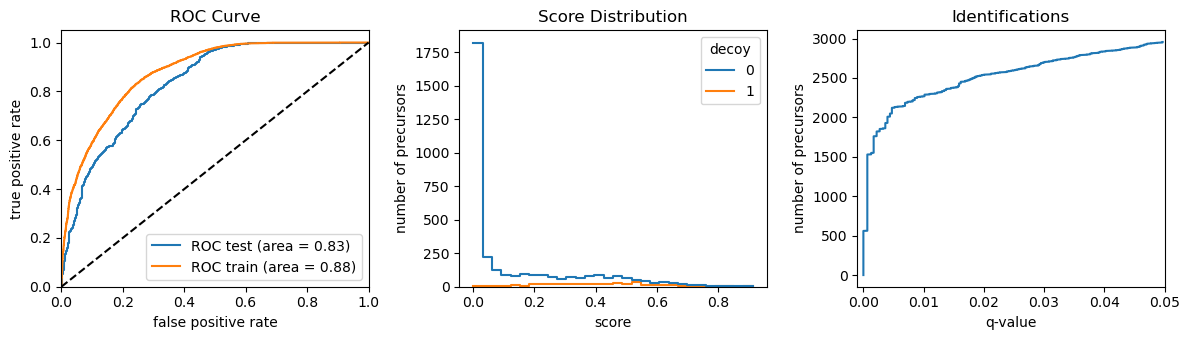

0:04:23.524473  PROGRESS: === checking if recalibration conditions were reached, target 600 precursors ===
0:04:23.524741  PROGRESS: Accumulated precursors: 3,892, 0.01 FDR: 2,267, 0.001 FDR: 1,530
0:04:23.526106  INFO: calibration group: precursor, fitting mz estimator 


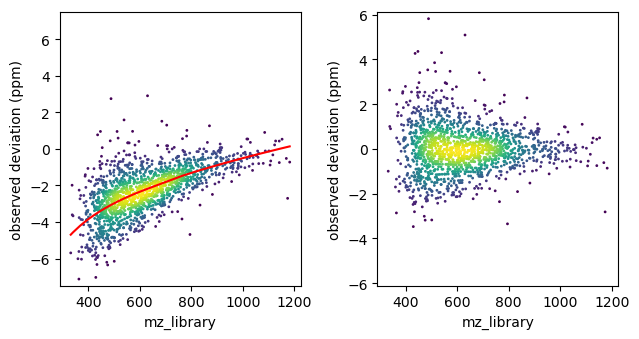

0:04:23.641623  INFO: calibration group: precursor, fitting rt estimator 


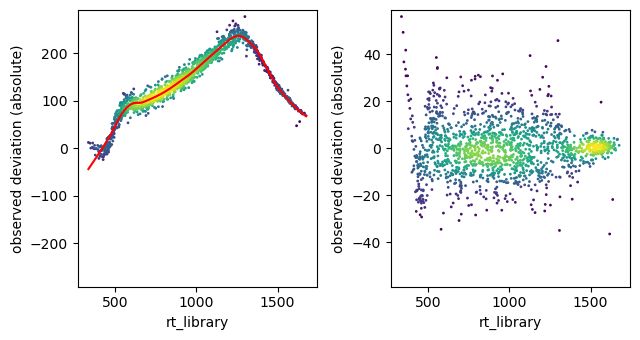

0:04:23.750544  INFO: calibration group: precursor, fitting mobility estimator 


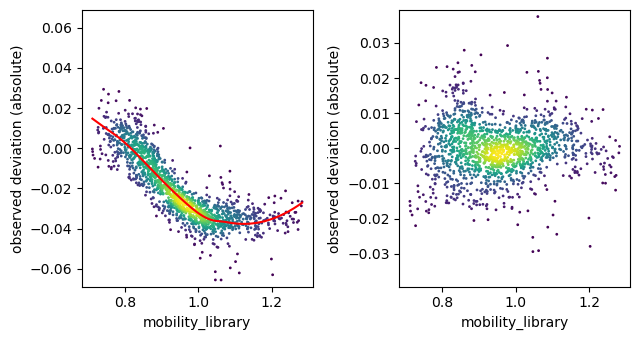

0:04:23.872088  INFO: calibration group: fragment, fitting mz estimator 


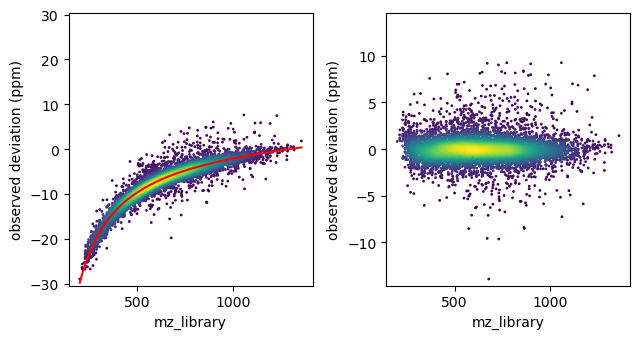

0:04:24.381002  INFO: calibration group: precursor, predicting mz
0:04:24.392023  INFO: calibration group: precursor, predicting rt
0:04:24.416515  INFO: calibration group: precursor, predicting mobility
0:04:24.426592  INFO: calibration group: fragment, predicting mz
0:04:24.725964  INFO: calibration group: precursor, predicting mz
0:04:24.737970  INFO: calibration group: precursor, predicting rt
0:04:24.783604  INFO: calibration group: precursor, predicting mobility
0:04:24.795442  INFO: calibration group: fragment, predicting mz


In [5]:

for dia_data, precursors_flat, fragments_flat in plan.get_run_data():
    break
reference_flat = precursors_flat[precursors_flat['channel'] == 0].copy()

workflow = Workflow(
    plan.config, 
    dia_data, 
    reference_flat, 
    fragments_flat
)

workflow.calibration()
#workflow.calibration_manager.load(os.path.join(output_location, 'calibration.pkl'))
#workflow.calibration_manager.save(os.path.join(output_location, 'calibration.pkl'))

0:04:25.392770  INFO: calibration group: precursor, predicting mz
0:04:25.402935  INFO: calibration group: precursor, predicting rt
0:04:25.431170  INFO: calibration group: precursor, predicting mobility
0:04:25.441987  INFO: calibration group: fragment, predicting mz
0:04:25.735325  PROGRESS: MS1 error: 10, MS2 error: 15, RT error: 40, Mobility error: 0.04
0:04:25.750250  INFO: Duty cycle consists of 9 frames, 0.96 seconds cycle time
0:04:25.750666  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:04:25.750932  INFO: FWHM in RT is 4.53 seconds, sigma is 1.00
0:04:25.751139  INFO: FWHM in mobility is 0.007 1/K_0, sigma is 4.62


91732


100%|██████████| 293557/293557 [01:02<00:00, 4683.76it/s]
0:06:50.285421  WARNING: base_width_mobility has 194 NaNs ( 0.07 % out of 293557)
0:06:50.286735  WARNING: base_width_rt has 194 NaNs ( 0.07 % out of 293557)
0:06:50.287833  WARNING: rt_observed has 194 NaNs ( 0.07 % out of 293557)
0:06:50.288764  WARNING: mobility_observed has 194 NaNs ( 0.07 % out of 293557)
0:06:50.289722  WARNING: mono_ms1_intensity has 194 NaNs ( 0.07 % out of 293557)
0:06:50.290619  WARNING: top_ms1_intensity has 194 NaNs ( 0.07 % out of 293557)
0:06:50.291477  WARNING: sum_ms1_intensity has 194 NaNs ( 0.07 % out of 293557)
0:06:50.292425  WARNING: weighted_ms1_intensity has 194 NaNs ( 0.07 % out of 293557)
0:06:50.293464  WARNING: weighted_mass_deviation has 194 NaNs ( 0.07 % out of 293557)
0:06:50.294480  WARNING: weighted_mass_error has 194 NaNs ( 0.07 % out of 293557)
0:06:50.295485  WARNING: mz_library has 194 NaNs ( 0.07 % out of 293557)
0:06:50.296511  WARNING: mz_observed has 194 NaNs ( 0.07 % out 

(293169, 37)
(293169,)


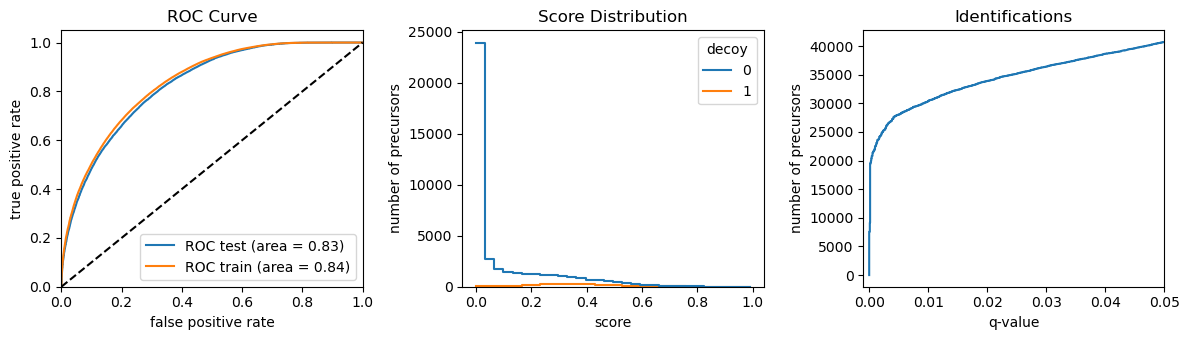

0:07:40.710381  PROGRESS: === extraction finished, 0.05 FDR: 38,776, 0.01 FDR: 30,071, 0.001 FDR: 22,391 ===


In [6]:
df_d0 = workflow.extraction()